In [2]:
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,Input
from keras.datasets import imdb

In [3]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data('D:/个人学习/data/imdb.npz',num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
len(x_train[0])

218

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [6]:
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(inputs,preds)
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,945
Trainable params: 

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=[x_test, y_test])

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 119s 5ms/step - loss: 0.4166 - acc: 0.8011 - val_loss: 0.3680 - val_acc: 0.8359


In [8]:
from keras.models import load_model

model.save('lstm_model.h5')

In [9]:
fx_model = load_model('lstm_model.h5')

In [14]:
loss,acc = fx_model.evaluate(x_test[:10000], y_test[:10000],batch_size=batch_size)

10000/10000 [==============================] - 5s 464us/step


In [15]:
loss

0.3751147536277771

In [16]:
acc

0.8315

In [47]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [45]:
from keras.utils.vis_utils import plot_model

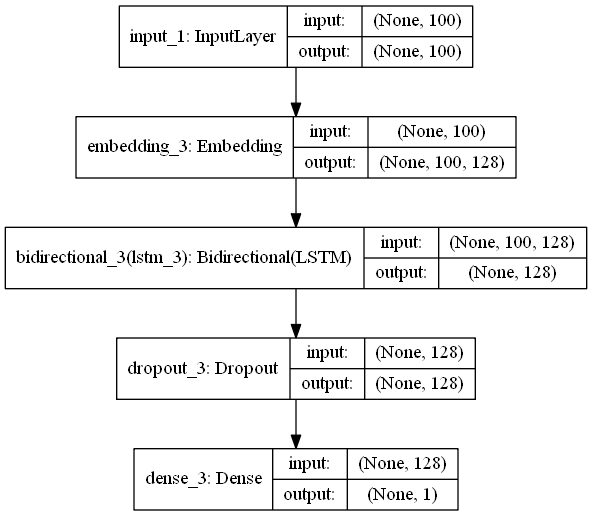

In [46]:
plot_model(model,'temp1.png',show_shapes=True)

In [17]:
from keras.layers import Conv1D, GlobalMaxPooling1D,MaxPooling1D,Activation

In [18]:
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = Dropout(0.2)(x)
x = Conv1D(250,3,padding='valid',activation='relu',strides=1)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(250,activation='relu')(x)
x = Dropout(0.2)(x)

preds = Dense(1, activation='sigmoid')(x)

model = Model(inputs,preds)
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 250)           96250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0   

In [23]:
model.to_yaml()

'backend: tensorflow\nclass_name: Model\nconfig:\n  input_layers:\n  - - input_2\n    - 0\n    - 0\n  layers:\n  - class_name: InputLayer\n    config:\n      batch_input_shape: !!python/tuple\n      - null\n      - 100\n      dtype: float32\n      name: input_2\n      sparse: false\n    inbound_nodes: []\n    name: input_2\n  - class_name: Embedding\n    config:\n      activity_regularizer: null\n      batch_input_shape: !!python/tuple\n      - null\n      - null\n      dtype: float32\n      embeddings_constraint: null\n      embeddings_initializer:\n        class_name: RandomUniform\n        config:\n          maxval: 0.05\n          minval: -0.05\n          seed: null\n      embeddings_regularizer: null\n      input_dim: 20000\n      input_length: null\n      mask_zero: false\n      name: embedding_2\n      output_dim: 128\n      trainable: true\n    inbound_nodes:\n    - - - input_2\n        - 0\n        - 0\n        - {}\n    name: embedding_2\n  - class_name: Dropout\n    config:\

In [20]:
modelJson = model.to_json()

In [21]:
modelJson

'{"class_name": "Model", "config": {"name": "model_2", "layers": [{"name": "input_2", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 100], "dtype": "float32", "sparse": false, "name": "input_2"}, "inbound_nodes": []}, {"name": "embedding_2", "class_name": "Embedding", "config": {"name": "embedding_2", "trainable": true, "batch_input_shape": [null, null], "dtype": "float32", "input_dim": 20000, "output_dim": 128, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": null}, "inbound_nodes": [[["input_2", 0, 0, {}]]]}, {"name": "dropout_2", "class_name": "Dropout", "config": {"name": "dropout_2", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}, "inbound_nodes": [[["embedding_2", 0, 0, {}]]]}, {"name": "conv1d_1", "class_name": "Conv1D", "con

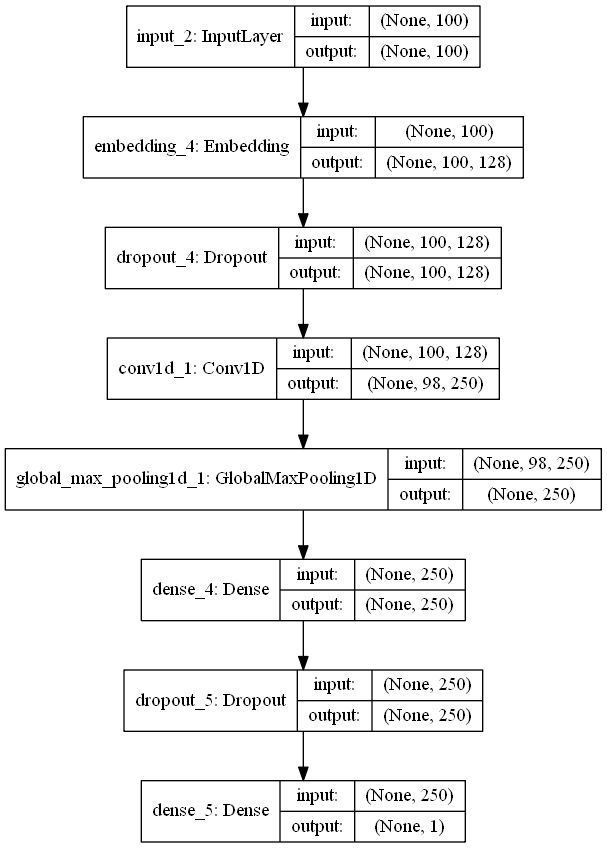

In [52]:
plot_model(model,'temp2.png',show_shapes=True)

In [55]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

In [61]:

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 71        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

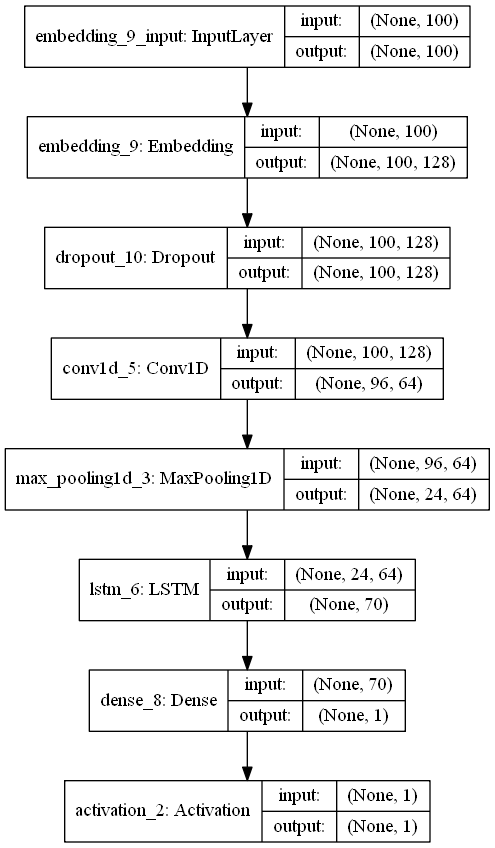

In [62]:
plot_model(model,'temp3.png',show_shapes=True)